In [69]:
import numpy as np 
import pandas as pd 

# Import Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import Model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,StandardScaler
#Import Sampler libraries
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier



# Load and Read data

In [70]:
data=pd.read_csv("diabetes_prediction_dataset.csv")

# Explore Data

In [71]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [72]:
r,c=data.shape
print(f"Number of Rows: {r} \nNumber of Columns: {c}")

Number of Rows: 100000 
Number of Columns: 9


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [74]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [75]:
data.describe()


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [76]:
data.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


<Axes: ylabel='count'>

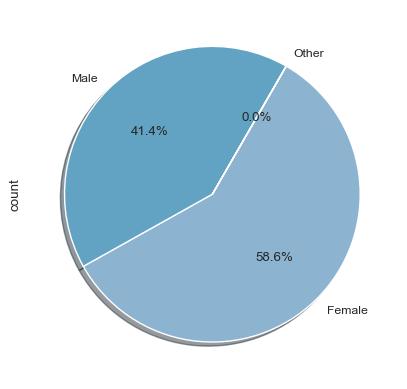

In [77]:
data['gender'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,startangle=60, counterclock=False,)

<Axes: ylabel='count'>

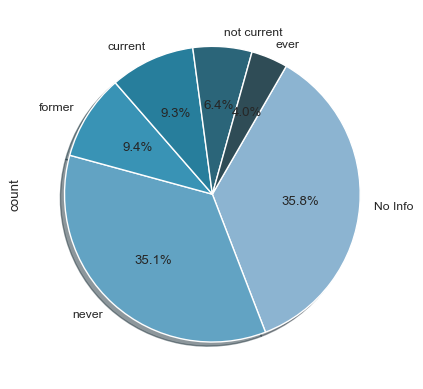

In [78]:
data['smoking_history'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,startangle=60, counterclock=False,)


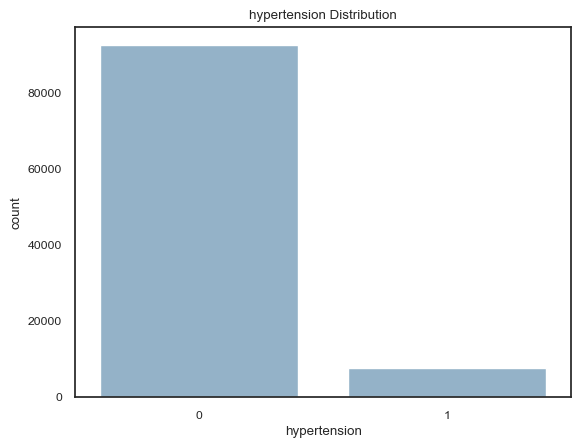

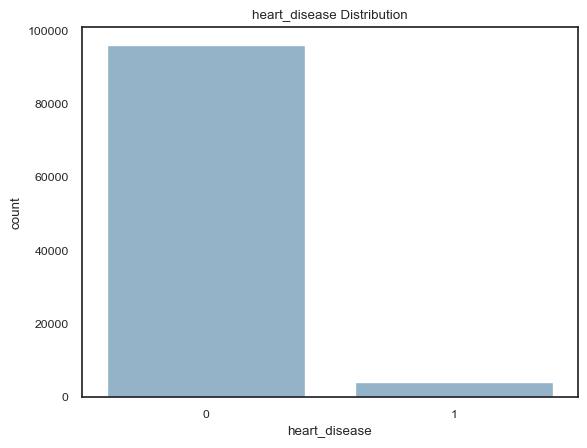

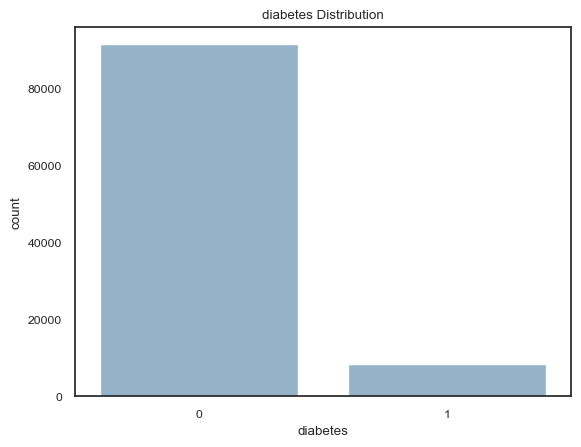

In [79]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=data)
    plt.title(f'{col} Distribution')
    plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >]],
      dtype=object)

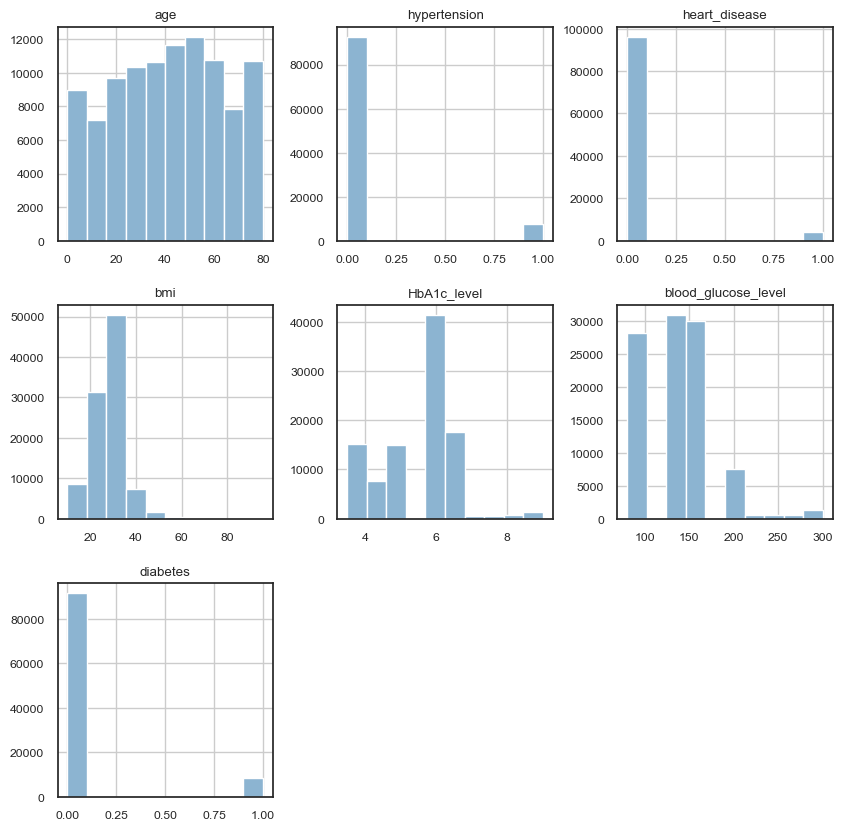

In [80]:
data.hist(figsize=(10,10))

In [81]:
data.duplicated().sum()

3854

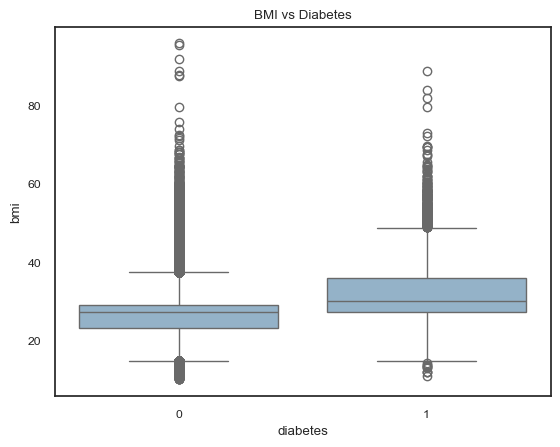

In [82]:

sns.boxplot(x='diabetes', y='bmi', data=data)
plt.title('BMI vs Diabetes')
plt.show()

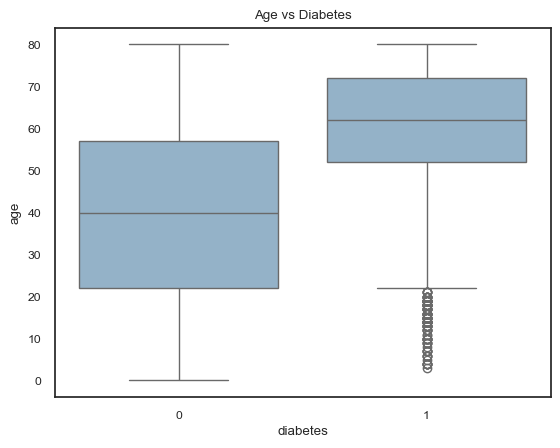

In [83]:
sns.boxplot(x='diabetes', y='age', data=data)
plt.title('Age vs Diabetes')
plt.show()


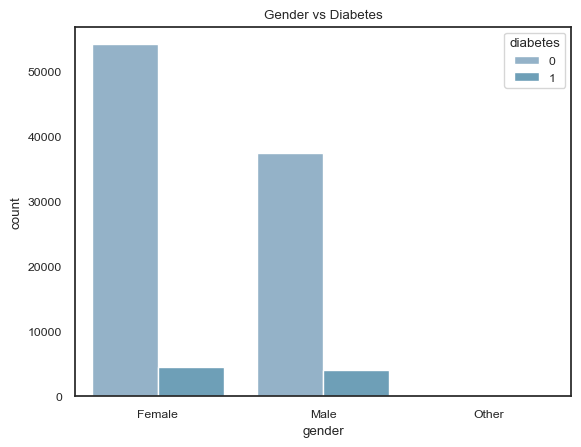

In [84]:
sns.countplot(x='gender',hue='diabetes',data=data)
plt.title('Gender vs Diabetes')
plt.show()

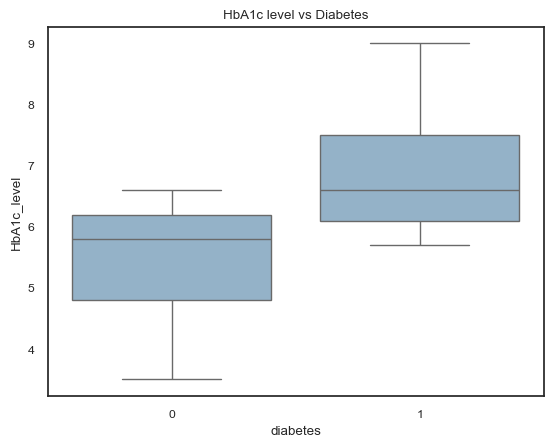

In [85]:
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('HbA1c level vs Diabetes')
plt.show()

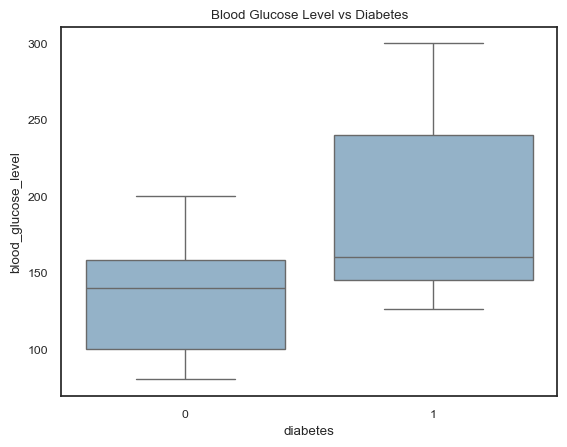

In [86]:
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

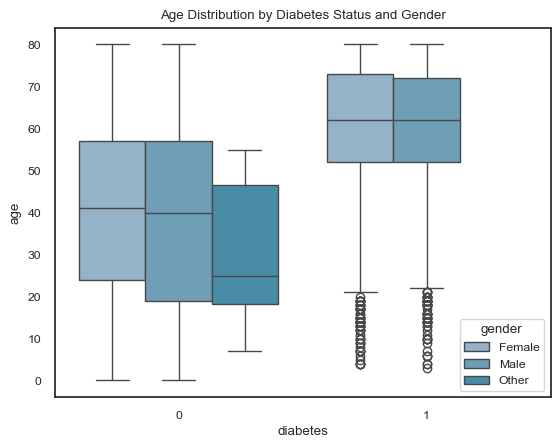

In [87]:
sns.boxplot(x='diabetes', y='age', hue='gender', data=data)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

In [88]:
data['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

# preprocessing

In [89]:
df=data.copy()

In [90]:
df=df.drop_duplicates()

In [91]:
df=df[df['gender']!='Other']

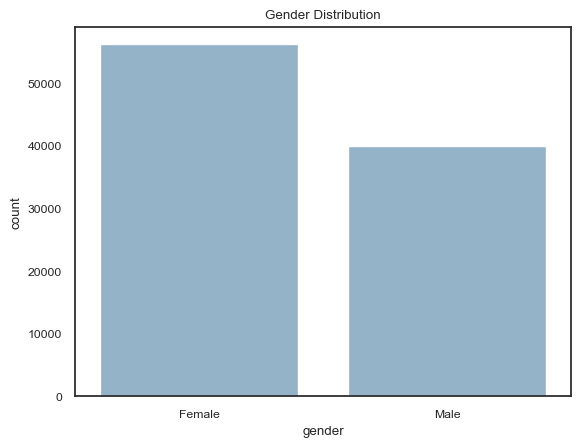

In [92]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

In [93]:
numeric_col=df.select_dtypes(include=['float64','int64']).columns

In [94]:
numeric_col

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [95]:
label_encoder =LabelEncoder()
df['smoking_history']=label_encoder.fit_transform(df['smoking_history'])

In [96]:
dummy_col=pd.get_dummies(df['gender'], prefix='gender')
df = pd.concat([df.drop('gender', axis=1), dummy_col], axis=1)

In [97]:
df.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male
0,80.0,0,1,4,25.19,6.6,140,0,True,False
1,54.0,0,0,0,27.32,6.6,80,0,True,False
2,28.0,0,0,4,27.32,5.7,158,0,False,True
3,36.0,0,0,1,23.45,5.0,155,0,True,False
4,76.0,1,1,1,20.14,4.8,155,0,False,True


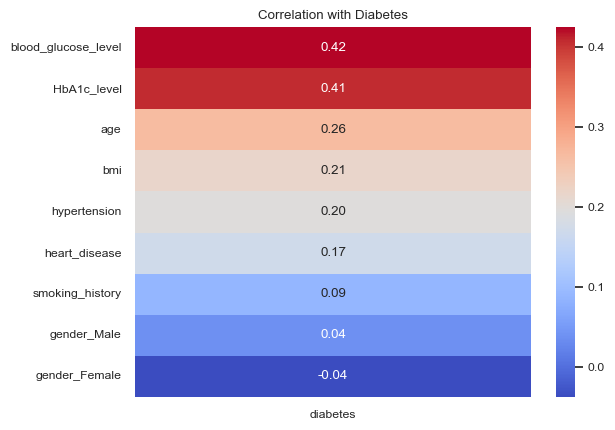

In [98]:
corr=df.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

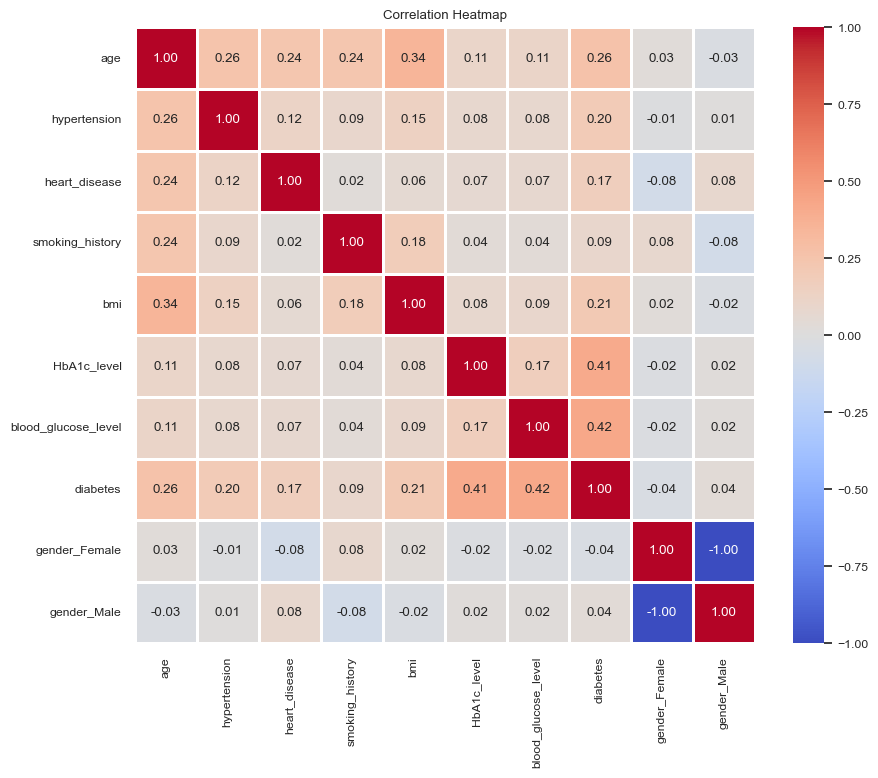

In [99]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

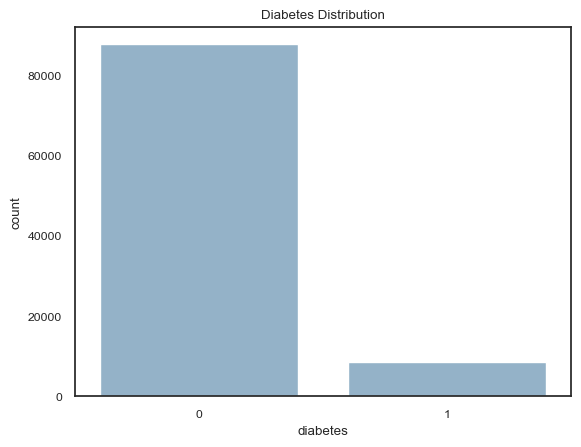

In [100]:
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [101]:
final_df=df.drop(['diabetes'],axis=1)
y=df['diabetes']

In [102]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(final_df, y)

In [103]:
# numeric_col=['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
#        'blood_glucose_level']

In [104]:
# scaler = StandardScaler()
# X_res[numeric_col]=scaler.fit_transform(X_res[numeric_col])

In [105]:
y_res.value_counts()

diabetes
0    87646
1    87646
Name: count, dtype: int64

# build model

In [106]:

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [107]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=400, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Linear Regression': LinearRegression()
}

In [108]:
def evaluate_model(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [109]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 140233 entries, 108559 to 121958
Series name: diabetes
Non-Null Count   Dtype
--------------   -----
140233 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140233 entries, 108559 to 121958
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  140233 non-null  float64
 1   hypertension         140233 non-null  int64  
 2   heart_disease        140233 non-null  int64  
 3   smoking_history      140233 non-null  int32  
 4   bmi                  140233 non-null  float64
 5   HbA1c_level          140233 non-null  float64
 6   blood_glucose_level  140233 non-null  int64  
 7   gender_Female        140233 non-null  bool   
 8   gender_Male          140233 non-null  bool   
dtypes: bool(2), float64(3), int32(1), int64(3)
memory usage: 8.3 MB


In [111]:
# Assuming y_train is your target variable
print(y_train.dtypes)
print(y_train.unique())


int64
[1 0]


In [112]:
# Assuming y_pred are the predictions from your model
print(y_pred[:10])  # Print the first 10 predictions to inspect the format
print(type(y_pred))  # Check the type of y_pred


[0, 0, 0, 1, 1, 1, 1, 0, 0, 0]
<class 'list'>


In [113]:
y_train.unique()

array([1, 0], dtype=int64)

In [114]:
y_test.unique()

array([0, 1], dtype=int64)

In [116]:
performance = {}
for name, model in models.items():
    if name == 'Linear Regression' or 'Random Forest':
        # Special handling for Linear Regression to convert predictions to binary
        model.fit(X_train, y_train)
        y_pred_continuous = model.predict(X_test)
        y_pred = [1 if p > 0.5 else 0 for p in y_pred_continuous]
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
    else:
        y_pred= model.predict(X_test)
        accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)
    
    performance[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


C:\Users\sondo\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [117]:
performance_df = pd.DataFrame(performance).T
performance_df

,Accuracy,Precision,Recall,F1 Score
Random Forest,0.979891,0.987642,0.972093,0.979806
Decision Tree,0.967626,0.964131,0.971638,0.967870
AdaBoost,0.971134,0.985024,0.957031,0.970826
K-Nearest Neighbors,0.944180,0.911089,0.984881,0.946549
Linear Regression,0.907556,0.923068,0.889962,0.906213
